In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge scikit-surprise
from surprise import accuracy, Dataset, SVD, Reader
from surprise.model_selection import train_test_split, cross_validate, KFold

In [24]:
df = pd.read_csv('Video_Games.zip', compression='zip')

In [4]:
df.shape

(2565349, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565349 entries, 0 to 2565348
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   product_id  object 
 1   user_id     object 
 2   rating      float64
 3   time_stamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 78.3+ MB


In [6]:
print(f'Итого: в датасете {df.shape[0]} наблюдений, {df.shape[1]} признаков, категориальные - ID пользователя и ID игры, числовые - рейтинг и время в формате timestamp')

Итого: в датасете 2565349 наблюдений, 4 признаков, категориальные - ID пользователя и ID игры, числовые - рейтинг и время в формате timestamp


In [7]:
df.head(10)

,product_id,user_id,rating,time_stamp
0,0439381673,A21ROB4YDOZA5P,1.0,1402272000
1,0439381673,A3TNZ2Q5E7HTHD,3.0,1399680000
2,0439381673,A1OKRM3QFEATQO,4.0,1391731200
3,0439381673,A2XO1JFCNEYV3T,1.0,1391731200
4,0439381673,A19WLPIRHD15TH,4.0,1389830400
5,0439381673,A1TLA7XXSZMTS7,5.0,1389052800
6,0439381673,A3I9GK5OO42B0I,3.0,1382400000
7,0439381673,A3TPP95Y9DH3L9,5.0,1382313600
8,0439381673,A19GOZTT15KPG1,5.0,1351468800
9,0439381673,A1441WFJ5KRP7J,5.0,1265587200


Ищем пропуски в данных:

In [8]:
df.isnull().sum()

product_id    0
user_id       0
rating        0
time_stamp    0
dtype: int64

In [9]:
unique = df['product_id'].unique()
print(f'Количество товаров: {len(unique)}')

Количество товаров: 71982


In [10]:
unique = df['user_id'].unique()
print(f'Количество пользователей: {len(unique)}')

Количество пользователей: 1540618


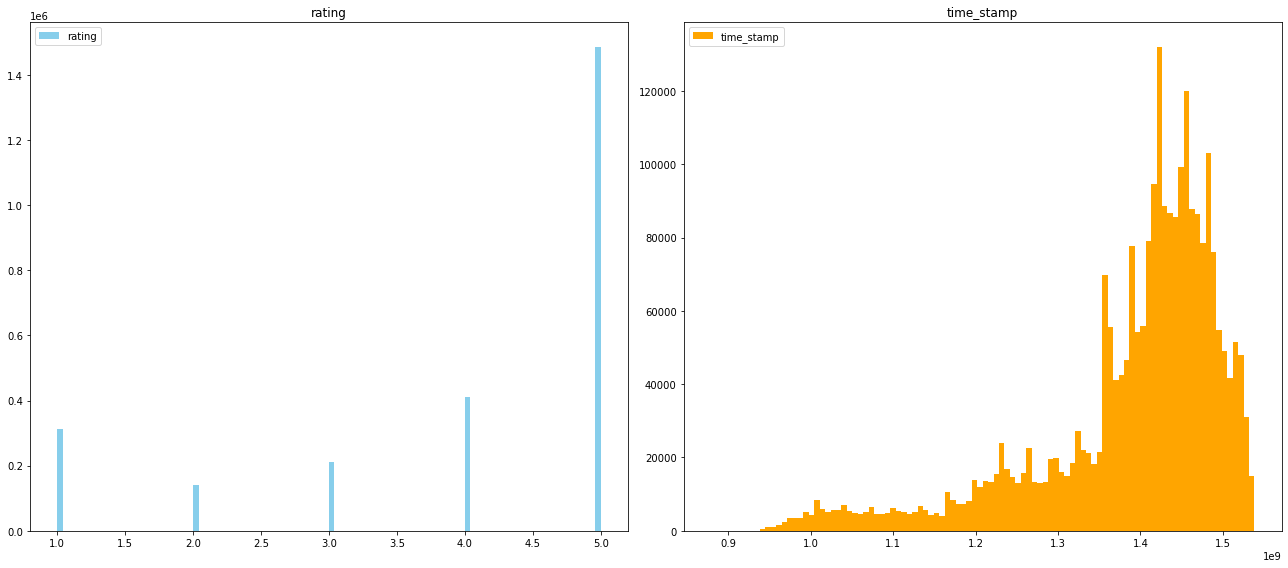

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
axes = axes.ravel()
for feature_index, ax in enumerate(axes):
    ax.figure
    feature_name = 'rating' if feature_index == 0 else 'time_stamp'
    ax.hist(df[feature_name], 100, alpha=1.0, label=f'{feature_name}', color='skyblue' if feature_index == 0 else 'orange')
    ax.legend(loc='upper left')
    ax.set_title(feature_name)
plt.tight_layout()
plt.show();

Создаем датасет для работы surprise с учетом временной метки:

In [12]:
reader = Reader(line_format='item user rating timestamp', sep=',', rating_scale=(1.0, 5.0), skip_lines=1)
data = Dataset.load_from_file('Video_Games.csv', reader=reader)

Разбиваем на тренировочный и тестовый наборы:

In [21]:
train_set, test_set = train_test_split(data, test_size=0.3)

Посчитаем метрики для всего набора, чтобы потом оценить наш тестовый набор:

In [16]:
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.2951  1.2942  1.2987  1.2960  0.0019  
MAE (testset)     1.0241  1.0233  1.0265  1.0247  0.0013  
Fit time          58.69   65.71   63.38   62.59   2.92    
Test time         39.66   14.66   8.13    20.81   13.59   


{'test_rmse': array([1.29513839, 1.2942025 , 1.29866202]),
 'test_mae': array([1.02413802, 1.02334529, 1.02647972]),
 'fit_time': (58.688883543014526, 65.70957136154175, 63.38431096076965),
 'test_time': (39.655890703201294, 14.65577244758606, 8.132796287536621)}

In [22]:
predictions = algo.fit(train_set).test(test_set)
accuracy.rmse(predictions)

RMSE: 1.2819


1.2818594688946463

Как видно по значению RMSE наше предсказание не сильно отличается от рассчитанного по кросс-валидации для всего набора данных.

Наша построенная система:

In [23]:
predictions

[Prediction(uid='A285K1D8FH1O03', iid='B0016B28Y8', r_ui=5.0, est=4.961177655727183, details={'was_impossible': False}),
 Prediction(uid='A14NVZDHDZHA3J', iid='B006F20T9Y', r_ui=5.0, est=4.475404939007802, details={'was_impossible': False}),
 Prediction(uid='A2FZJYH4RAJWG8', iid='B00ZCEW8P4', r_ui=5.0, est=4.3742692802641265, details={'was_impossible': False}),
 Prediction(uid='A2582KMXLK2P06', iid='B00000I1C1', r_ui=5.0, est=4.160488762916932, details={'was_impossible': False}),
 Prediction(uid='A2SDMIV5M89RCI', iid='B00KN7Y3EY', r_ui=5.0, est=4.8437905887552155, details={'was_impossible': False}),
 Prediction(uid='A1KTEC9SZTGTDM', iid='B0132YMY5Y', r_ui=1.0, est=4.470217448647439, details={'was_impossible': False}),
 Prediction(uid='A1T32ZH9FBASYS', iid='B00W435C0Y', r_ui=5.0, est=3.9378263636872184, details={'was_impossible': False}),
 Prediction(uid='A2CGQAPIEVD9LU', iid='B00K308KF4', r_ui=5.0, est=3.7229658284226774, details={'was_impossible': False}),
 Prediction(uid='AYVAGN20HVI